In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from google.colab import files
import io

In [3]:
print("Please upload your dataset (CSV file).")
uploaded = files.upload()

Please upload your dataset (CSV file).


Saving cleaned_weather.csv to cleaned_weather.csv


In [4]:
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

Uploaded file: cleaned_weather.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded[filename]))

In [6]:
print("\nColumn names in the dataset:", df.columns.tolist())


Column names in the dataset: ['date', 'p', 'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC', 'rho', 'wv', 'max. wv', 'wd', 'rain', 'raining', 'SWDR', 'PAR', 'max. PAR', 'Tlog']


In [7]:
date_column = input("\nEnter the column name for the date (or press Enter if no date column): ").strip()


Enter the column name for the date (or press Enter if no date column): date


In [8]:
if date_column and date_column in df.columns:
    df[date_column] = pd.to_datetime(df[date_column])  # Convert to datetime format
    df.set_index(date_column, inplace=True)  # Set as index
    print(f"\n'{date_column}' column set as index.")
else:
    print("\nNo date column provided or found. Using default index.")


'date' column set as index.


In [9]:
print("\nFirst few rows of the dataset:")
print(df.head())



First few rows of the dataset:
                           p     T    Tpot  Tdew    rh  VPmax  VPact  VPdef  \
date                                                                          
2020-01-01 00:10:00  1008.89  0.71  273.18 -1.33  86.1   6.43   5.54   0.89   
2020-01-01 00:20:00  1008.76  0.75  273.22 -1.44  85.2   6.45   5.49   0.95   
2020-01-01 00:30:00  1008.66  0.73  273.21 -1.48  85.1   6.44   5.48   0.96   
2020-01-01 00:40:00  1008.64  0.37  272.86 -1.64  86.3   6.27   5.41   0.86   
2020-01-01 00:50:00  1008.61  0.33  272.82 -1.50  87.4   6.26   5.47   0.79   

                       sh  H2OC      rho    wv  max. wv     wd  rain  raining  \
date                                                                            
2020-01-01 00:10:00  3.42  5.49  1280.62  1.02     1.60  224.3   0.0      0.0   
2020-01-01 00:20:00  3.39  5.45  1280.33  0.43     0.84  206.8   0.0      0.0   
2020-01-01 00:30:00  3.39  5.43  1280.29  0.61     1.48  197.1   0.0      0.0   
2020-01-0

In [10]:
column_name = input("\nEnter the column name for time-series analysis (e.g., Temperature): ").strip()


Enter the column name for time-series analysis (e.g., Temperature): T


In [11]:
if column_name not in df.columns:
    print(f"\nError: Column '{column_name}' not found in dataset.")
else:
    ts = df[column_name]

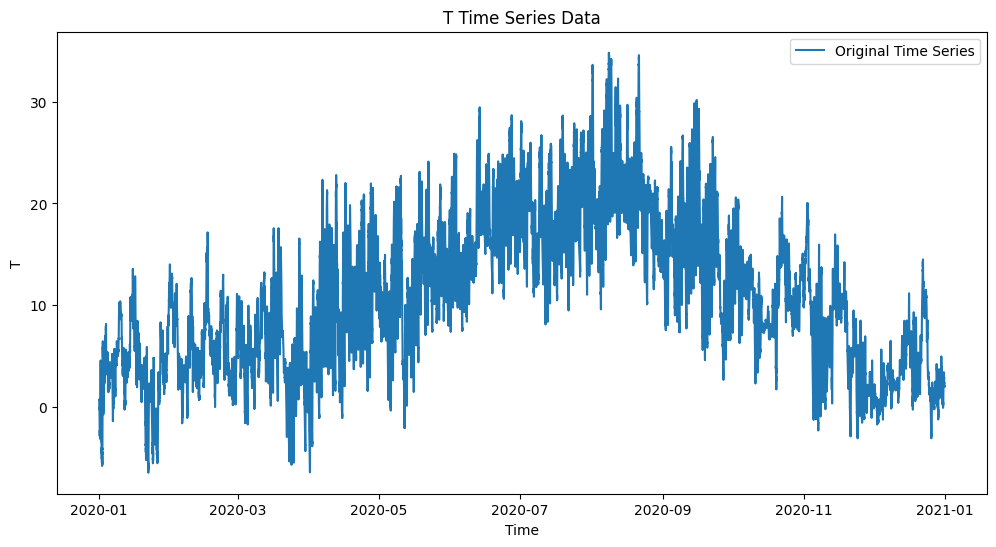

In [12]:
 plt.figure(figsize=(12,6))
 plt.plot(ts, label="Original Time Series")
 plt.title(f"{column_name} Time Series Data")
 plt.xlabel("Time")
 plt.ylabel(column_name)
 plt.legend()
 plt.show()

In [13]:
rolling_window = 12  # Choose a window size
rolmean = ts.rolling(window=rolling_window).mean()
rolstd = ts.rolling(window=rolling_window).std()


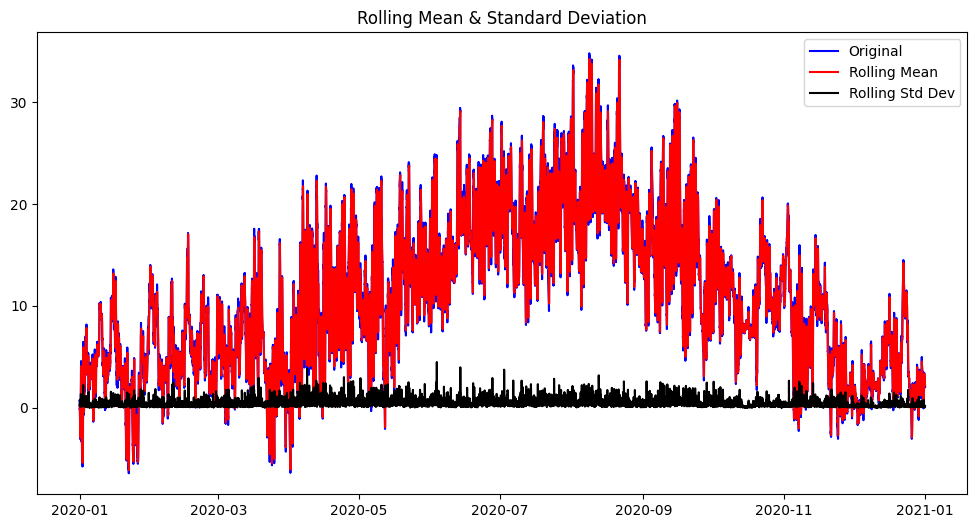

In [14]:
    plt.figure(figsize=(12,6))
    plt.plot(ts, color="blue", label="Original")
    plt.plot(rolmean, color="red", label="Rolling Mean")
    plt.plot(rolstd, color="black", label="Rolling Std Dev")
    plt.title("Rolling Mean & Standard Deviation")
    plt.legend()
    plt.show()

In [15]:
   def adf_test(timeseries):
        print("\nResults of Augmented Dickey-Fuller Test:")
        adf_result = adfuller(timeseries.dropna())  # Drop NaN values
        labels = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"]
        for value, label in zip(adf_result[:4], labels):
            print(f"{label}: {value}")

        print("\nCritical Values:")
        for key, value in adf_result[4].items():
            print(f"\t{key}: {value}")
        if adf_result[1] <= 0.05:
            print("\nConclusion: The time series is STATIONARY (p-value <= 0.05)")
        else:
            print("\nConclusion: The time series is NON-STATIONARY (p-value > 0.05)")
   adf_test(ts)


Results of Augmented Dickey-Fuller Test:
Test Statistic: -8.407443757648588
p-value: 2.1485277355859027e-13
#Lags Used: 58
Number of Observations Used: 52637

Critical Values:
	1%: -3.43047423996295
	5%: -2.8615949115726993
	10%: -2.5667992276035014

Conclusion: The time series is STATIONARY (p-value <= 0.05)
